In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df.isnull().values.any()
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['Date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('Date')
Daily_Price = group['Weighted_Price'].mean()
Daily_Price.head()

Date
2011-12-31    4.471603
2012-01-01    4.806667
2012-01-02    5.000000
2012-01-03    5.252500
2012-01-04    5.208159
Name: Weighted_Price, dtype: float64

In [4]:
new_df= pd.DataFrame(list(Daily_Price), index = Daily_Price.index, columns = ["Close"])

In [5]:
new_df.head()

,Close
Date,
2011-12-31,4.471603
2012-01-01,4.806667
2012-01-02,5.000000
2012-01-03,5.252500
2012-01-04,5.208159


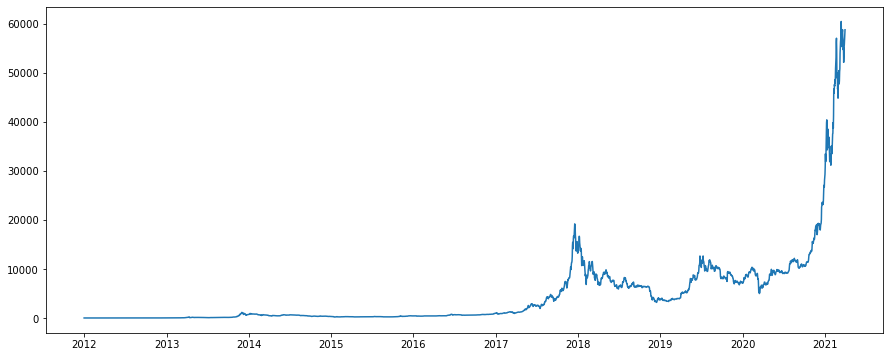

In [6]:
plt.plot(new_df)

In [7]:
# df = df[['Close']]
df=new_df
forecast_out = int(30)

df['Prediction'] = df[['Close']].shift(-forecast_out)

X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = LinearRegression()
clf.fit(X_train,y_train)

cross_validation = clf.predict(X_test)

confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

confidence:  0.9373649530797566
[57585.72504272 59742.7649424  58515.31431092 56514.86337002
 57293.21028232 59491.33218546 60181.87813455 63970.0456493
 65629.96176392 66697.94848215 67357.33872738 69709.44955166
 71677.32892449 68168.15056016 65587.63245624 66561.56266468
 69316.06937266 69091.61257459 69682.27207615 67935.87738906
 67310.42651675 64830.09603354 65330.74957609 61757.05685541
 63089.43937414 65413.31384005 66174.64083462 67461.41242793
 69167.03598653 69663.91739904]


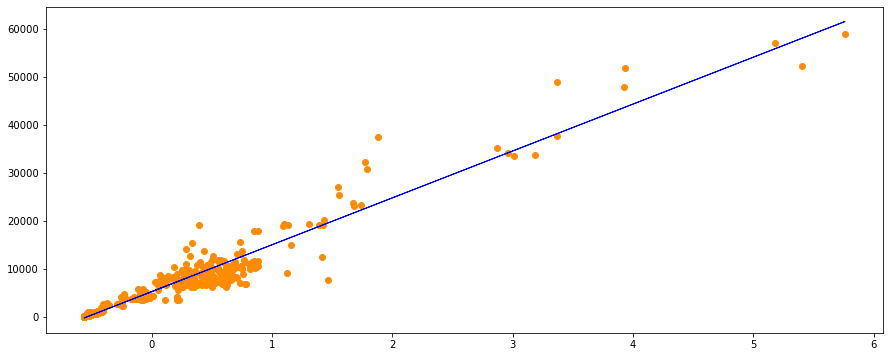

In [8]:
import matplotlib.pyplot as plt
# print(X_test)
# print(y_test)
# plt.plot(X_test,forecast_set,color='blue', linewidth=1)
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.plot(X_test, cross_validation, color='blue', linewidth=1)
# plt.plot(X_test, forecast_prediction, color='blue', linew/idth=2)
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, cross_validation))
print(rms)

1845.5786899649218


In [11]:
pred={}
forecast_prediction


array([57585.72504272, 59742.7649424 , 58515.31431092, 56514.86337002,
       57293.21028232, 59491.33218546, 60181.87813455, 63970.0456493 ,
       65629.96176392, 66697.94848215, 67357.33872738, 69709.44955166,
       71677.32892449, 68168.15056016, 65587.63245624, 66561.56266468,
       69316.06937266, 69091.61257459, 69682.27207615, 67935.87738906,
       67310.42651675, 64830.09603354, 65330.74957609, 61757.05685541,
       63089.43937414, 65413.31384005, 66174.64083462, 67461.41242793,
       69167.03598653, 69663.91739904])

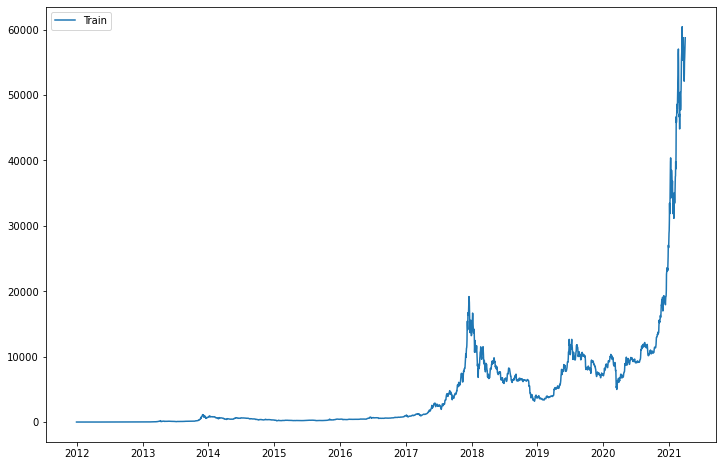

In [12]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'], label='Train')
# plt.plot(X_test['Close'], label='Test')
# plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()